# TASK 1 : STOCK PREDICTION

## PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM

### Google Stock Prediction

This dataset contains historical data of **Google's stock prices** and related attributes. It consists of 14 columns and a smaller subset of 1257 rows. Each column represents a specific attribute, and each row contains the corresponding values for that attribute.

The columns in the dataset are as follows:

1. **Symbol**: The name of the company, which is **GOOG** in this case.
2. **Date**: The year and date of the stock data.
3. **Close**: The closing price of Google's stock on a particular day.
4. **High**: The highest value reached by Google's stock on the given day.
5. **Low**: The lowest value reached by Google's stock on the given day.
6. **Open**: The opening value of Google's stock on the given day.
7. **Volume**: The trading volume of Google's stock on the given day, i.e., the number of shares traded.
8. **adjClose**: The adjusted closing price of Google's stock, considering factors such as dividends and stock splits.
9. **adjHigh**: The adjusted highest value reached by Google's stock on the given day.
10. **adjLow**: The adjusted lowest value reached by Google's stock on the given day.
11. **adjOpen**: The adjusted opening value of Google's stock on the given day.
12. **adjVolume**: The adjusted trading volume of Google's stock on the given day, accounting for factors such as stock splits.
13. **divCash**: The amount of cash dividend paid out to shareholders on the given day.
14. **splitFactor**: The split factor, if any, applied to Google's stock on the given day. A split factor of 1 indicates no split.


## STEPS INVOLVED :
### 1 . IMPORTING LIBRARIES AND DATA TO BE USED
### 2. GATHERING INSIGHTS
### 3. DATA PRE-PROCESSING
### 4. CREATING LSTM MODEL
### 5. VISUALIZING ACTUAL VS PREDICTED DATA
### 6. PREDICTING UPCOMING 15 DAYS

## STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv('data/Google_stock_price.csv') # data_importing
df.head() # fetching first 10 rows of dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


## STEP 2 : GATHERING INSIGHTS

In [3]:
# shape of data
print("Shape of data:",df.shape)

Shape of data: (4837, 7)


In [5]:
# statistical description of data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4837.000000,4837.000000,4837.000000,4837.000000,4837.000000,4.837000e+03
mean,41.070619,41.507095,40.651766,41.086987,41.086987,1.193482e+08
std,38.176245,38.615651,37.779492,38.202010,38.202010,1.514270e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.812725,12.948466,12.689935,12.826922,12.826922,2.870600e+07
50%,26.454842,26.656000,26.250000,26.456863,26.456863,6.216012e+07
75%,57.162498,57.635399,56.583000,57.210499,57.210499,1.470933e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [6]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4837 entries, 0 to 4836
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4837 non-null   object 
 1   Open       4837 non-null   float64
 2   High       4837 non-null   float64
 3   Low        4837 non-null   float64
 4   Close      4837 non-null   float64
 5   Adj Close  4837 non-null   float64
 6   Volume     4837 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 264.7+ KB


In [7]:
# checking null values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### There are no null values in the dataset

In [4]:
df = df[['Date','Open','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0])) # converting object dtype of date column to datetime dtype
df.set_index('Date',drop=True,inplace=True) # Setting date column as index
df.head(10)

,Open,Close
Date,,
2004-08-19,2.490664,2.499133
2004-08-20,2.515820,2.697639
2004-08-23,2.758411,2.724787
2004-08-24,2.770615,2.611960
2004-08-25,2.614201,2.640104
2004-08-26,2.613952,2.687676
2004-08-27,2.692408,2.643840
2004-08-30,2.622171,2.540727
2004-08-31,2.547950,2.549693


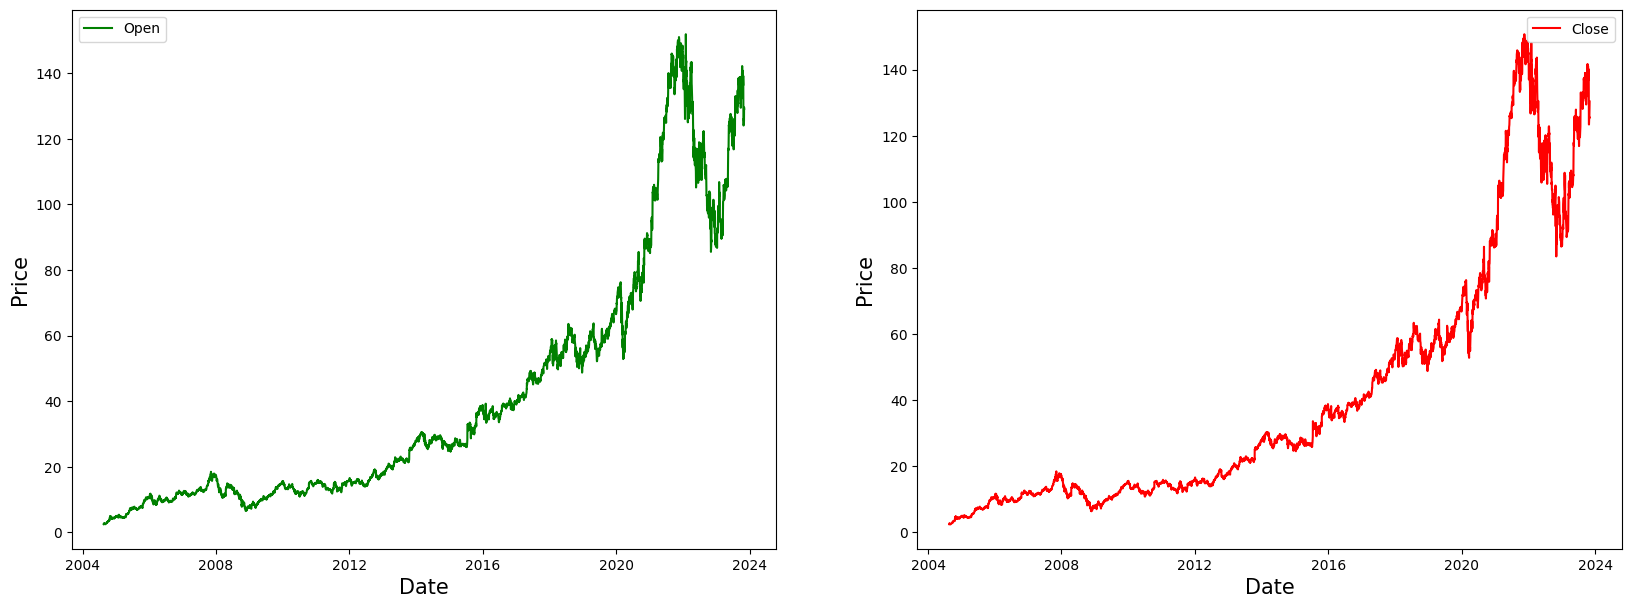

In [5]:
# plotting open and closing price on date index
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(df['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

## STEP 3 : DATA PRE-PROCESSING

In [6]:
# normalizing all the values of all columns using MinMaxScaler
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2004-08-19,0.000135,0.000055
2004-08-20,0.000303,0.001395
2004-08-23,0.001927,0.001578
2004-08-24,0.002009,0.000817
2004-08-25,0.000962,0.001007
2004-08-26,0.000960,0.001328
2004-08-27,0.001485,0.001032
2004-08-30,0.001015,0.000336
2004-08-31,0.000518,0.000397


In [7]:
# splitting the data into training and test set
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

3628

In [8]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((3628, 2), (1209, 2))

In [9]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [10]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3578, 50, 2), (3578, 2), (1159, 50, 2), (1159, 2))

## STEP 4 :  CREATING LSTM MODEL

In [11]:
# imported Sequential from keras.models
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# fitting the model by iterating the dataset over 100 times(100 epochs)
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
112/112 [==============================] - 18s 92ms/step - loss: 8.8284e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0039 - val_mean_absolute_error: 0.0469
Epoch 2/100
112/112 [==============================] - 9s 79ms/step - loss: 6.0224e-05 - mean_absolute_error: 0.0053 - val_loss: 0.0048 - val_mean_absolute_error: 0.0521
Epoch 3/100
112/112 [==============================] - 7s 65ms/step - loss: 6.4802e-05 - mean_absolute_error: 0.0056 - val_loss: 0.0057 - val_mean_absolute_error: 0.0574
Epoch 4/100
112/112 [==============================] - 7s 64ms/step - loss: 6.2458e-05 - mean_absolute_error: 0.0055 - val_loss: 0.0054 - val_mean_absolute_error: 0.0562
Epoch 5/100
112/112 [==============================] - 7s 65ms/step - loss: 5.8706e-05 - mean_absolute_error: 0.0053 - val_loss: 0.0046 - val_mean_absolute_error: 0.0509
Epoch 6/100
112/112 [==============================] - 7s 67ms/step - loss: 5.3323e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0032 - val_mean_ab

In [13]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:5]

37/37 [==============================] - 3s 23ms/step


array([[0.380998  , 0.38514948],
       [0.38710806, 0.3914283 ],
       [0.3892705 , 0.39345968],
       [0.39231312, 0.3964978 ],
       [0.39358613, 0.39770037]], dtype=float32)

In [15]:
# Inversing normalization/scaling on predicted data
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[59.388924, 59.577034],
       [60.301727, 60.507668],
       [60.624783, 60.808754],
       [61.079327, 61.259056],
       [61.269505, 61.4373  ]], dtype=float32)

## STEP 5 :  VISUALIZING ACTUAL VS PREDICTED DATA

In [17]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-1159:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-1159:].index)], axis=1)

In [18]:
# Inversing normalization/scaling
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2019-04-01,59.205002,59.721500,59.388924,59.577034
2019-04-02,59.765999,60.024502,60.301727,60.507668
2019-04-03,60.374001,60.296001,60.624783,60.808754
2019-04-04,60.297001,60.750000,61.079327,61.259056
2019-04-05,60.749500,60.357498,61.269505,61.437302


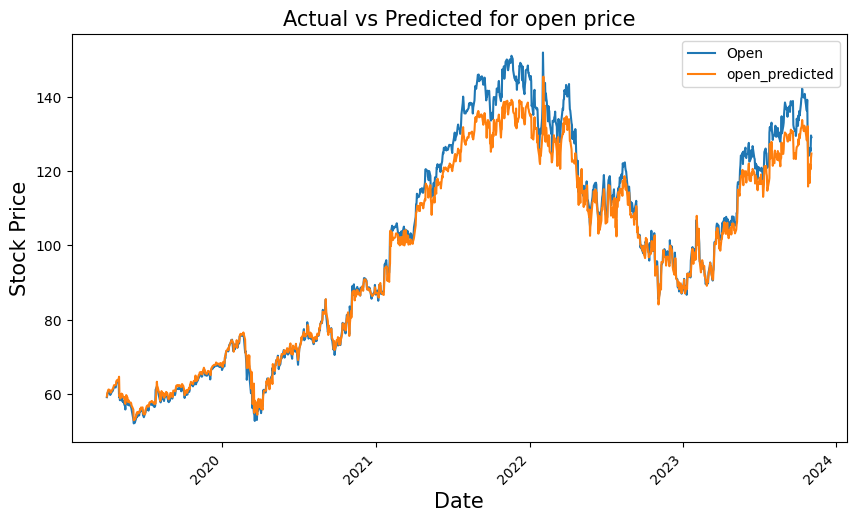

In [19]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

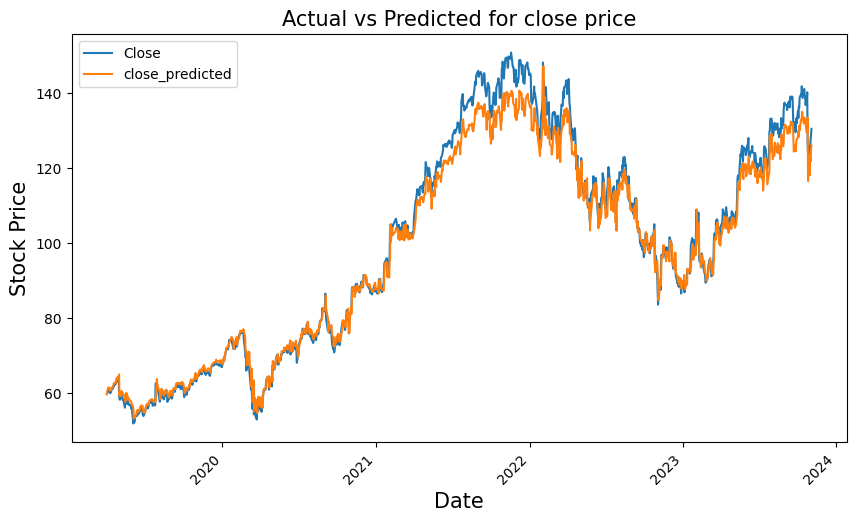

In [20]:
# plotting the actual close and predicted close prices on date index
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

## STEP 6. PREDICTING UPCOMING 10 DAYS

In [27]:
df_merge.tail()

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-10-30,124.459999,125.750000,116.789391,117.996956
2023-10-31,126.269997,125.300003,121.846375,123.304916
2023-11-01,125.339996,127.570000,120.479431,121.715538
2023-11-02,129.559998,128.580002,123.579933,124.898308
2023-11-03,129.089996,130.369995,124.717178,125.961601


In [30]:
# Creating a dataframe and adding 10 days to existing index

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2023-11-03':'2023-11-14']

AttributeError: 'DataFrame' object has no attribute 'append'

In [34]:
# Creating a dataframe and adding 10 days to existing index

new_df = pd.DataFrame(columns=df_merge.columns,
                       index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', inclusive='right'))
df_merge = pd.concat([df_merge, new_df])
df_merge['2023-11-03':'2023-11-14']

,Open,Close,open_predicted,close_predicted
2023-11-03,129.089996,130.369995,124.717178,125.961601
2023-11-04,NaN,NaN,NaN,NaN
2023-11-05,NaN,NaN,NaN,NaN
2023-11-06,NaN,NaN,NaN,NaN
2023-11-07,NaN,NaN,NaN,NaN
2023-11-08,NaN,NaN,NaN,NaN
2023-11-09,NaN,NaN,NaN,NaN
2023-11-10,NaN,NaN,NaN,NaN
2023-11-11,NaN,NaN,NaN,NaN
2023-11-12,NaN,NaN,NaN,NaN


In [35]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [36]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 39ms/step


In [37]:
# inversing Normalization/scaling
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

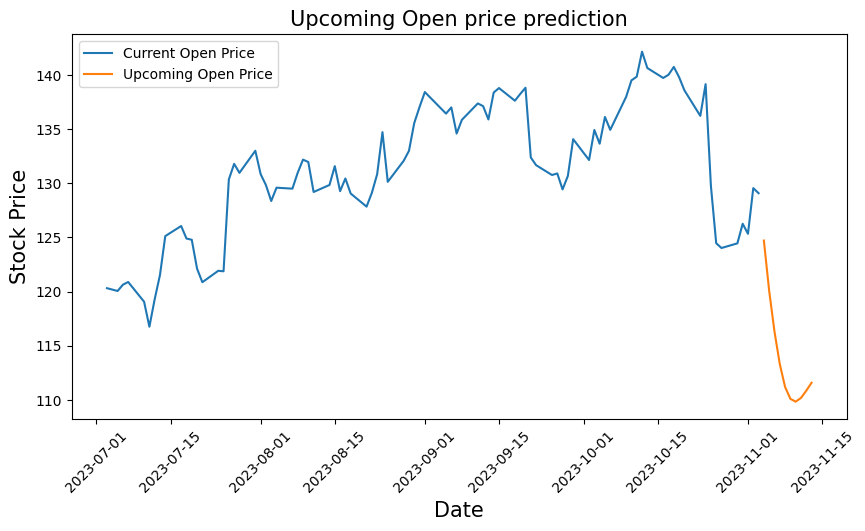

In [39]:
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-07-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-07-01':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

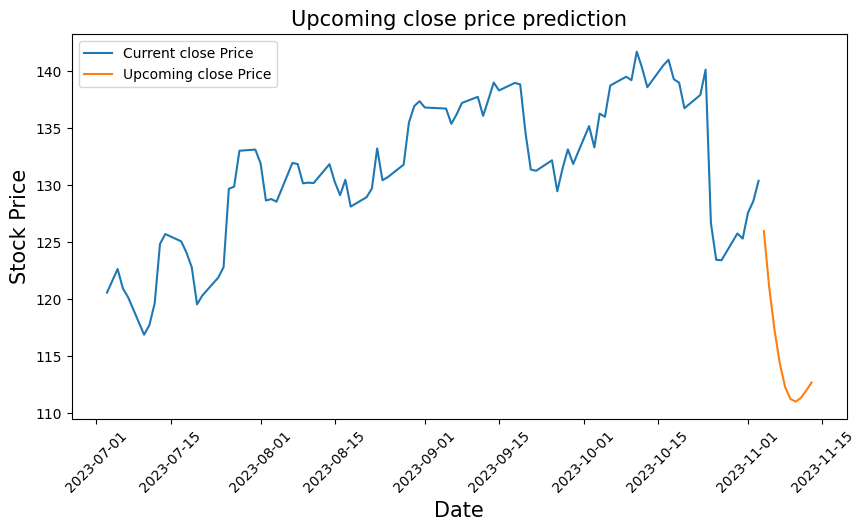

In [40]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-07-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2023-07-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()